# Plateau Detection

plateau

- 수학적으로는 n차 미분계수가 0이 되는 지점을 의미하나
- 값이 유지되는 지점을 의미한다.
- graph에서 평평한 영역 찾기.

1. Noise Reduction (기본)
   - ```scipy.ndimage```: signal averaging, median
   - ```np.hanning```, ```np.hamming```, ```np.bartlett``` , ```np.blackman```: smoothing of a 1D signal
2. Clustering (같은 값 찾기)
   - ```sklearn.cluster.DBSCAN```: unsupervised learning
3. Visualization (찾은 거 포함 시각화)
   - ```r'$ LaTeX_expr $'```: matplotlib's LaTeX expression
   - ```matplotlib.axes.Axes.axhline```: draw horizontal
   - ```matplotlib.axes.Axes.inset_axes```: matplotlib plot에서 inset 삽입
   - ```matplotlib.axes.Axes.fill_between```: matplotlib plot 중 조건에 맞는 구간 칠하기

### prepare

In [1]:
import pandas as pd
import numpy as np

import scipy as sp
from scipy import ndimage
from scipy.signal import savgol_filter as sg

import sklearn as skl
from sklearn.cluster import DBSCAN

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import seaborn as sns

In [2]:
plt.style.use("seaborn-whitegrid")
sns.set_context("talk")
%matplotlib inline

In [3]:
font_path = 'C:\\WINDOWS\\Fonts\\malgun.ttf'

font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc("font", family=font_name)

fm._rebuild()
mpl.rcParams["axes.unicode_minus"] = False

### data

In [4]:
df = pd.read_csv("https://jehyunlee.github.io/2020/03/20/Python-DS-6-plateau_detection/6_pld_data.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       490 non-null    float64
 1   Y       490 non-null    float64
dtypes: float64(2)
memory usage: 7.8 KB


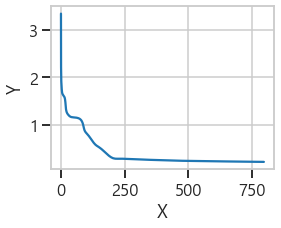

In [6]:
plt.figure(figsize=(4, 3))
plt.plot(df["X"], df["Y"])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## 3.1 1차, 2차, 3차 도함수를 이용한 계산

In [7]:
d1 = np.diff(df["Y"]) / np.diff(df["X"])
d2 = np.diff(d1) / np.diff(df["X"].iloc[:-1])
d3 = np.diff(d2) / np.diff(df["X"].iloc[:-2])

<ipython-input-7-1417ddad403a>:1: RuntimeWarning: divide by zero encountered in true_divide
  d1 = np.diff(df["Y"]) / np.diff(df["X"])
X:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1280: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


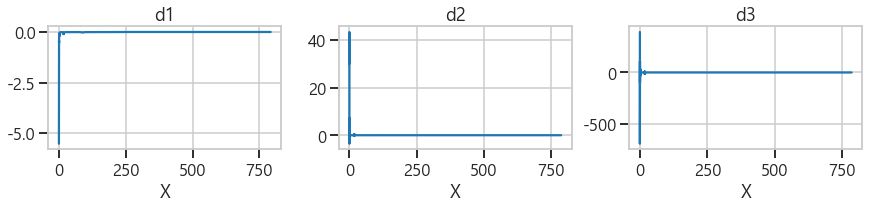

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
ax[0].plot(df["X"].iloc[:-1], d1)
ax[1].plot(df["X"].iloc[:-2], d2)
ax[2].plot(df["X"].iloc[:-3], d3)

for i in range(3):
    ax[i].set_title("d" + str(i + 1))
    ax[i].set_xlabel("X")
plt.tight_layout()

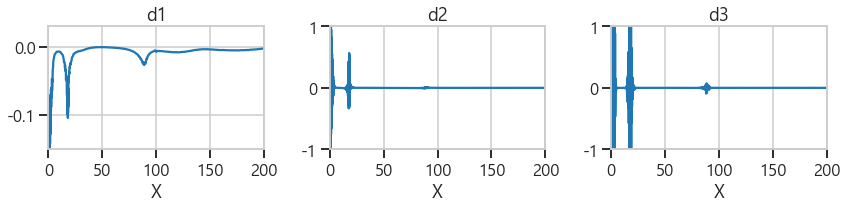

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
ax[0].plot(df["X"].iloc[:-1], d1)
ax[1].plot(df["X"].iloc[:-2], d2)
ax[2].plot(df["X"].iloc[:-3], d3)

for i in range(3):
    ax[i].set_xlim((0, 200))
    ax[i].set_xlabel("X")
    ax[i].set_title("d" + str(i + 1))

ax[0].set_ylim((-0.15, 0.03))
ax[1].set_ylim((-1, 1))
ax[2].set_ylim((-1, 1))

plt.tight_layout()

## 3.2 가로축 변환

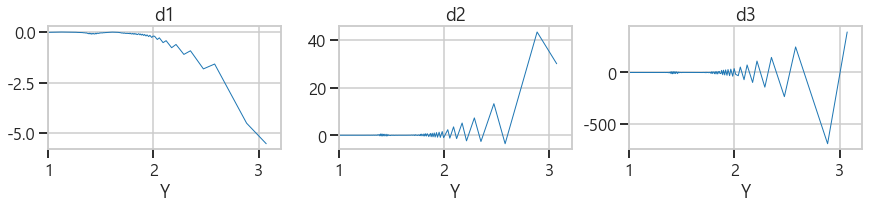

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
ax[0].plot(df["Y"].iloc[:-1], d1, lw=1)
ax[1].plot(df["Y"].iloc[:-2], d2, lw=1)
ax[2].plot(df["Y"].iloc[:-3], d3, lw=1)

for i in range(3):
    ax[i].set_xlim(1)
    ax[i].set_xlabel("Y")
    ax[i].set_title("d" + str(i + 1))

plt.tight_layout()

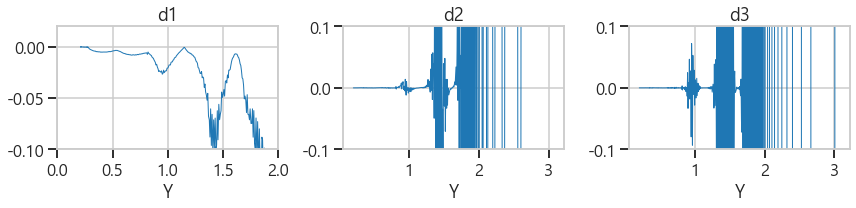

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
ax[0].plot(df["Y"].iloc[:-1], d1, lw=1)
ax[1].plot(df["Y"].iloc[:-2], d2, lw=1)
ax[2].plot(df["Y"].iloc[:-3], d3, lw=1)

for i in range(3):
    ax[i].set_xlabel("Y")
    ax[i].set_title("d" + str(i + 1))

ax[0].set_xlim((0, 2))
ax[0].set_ylim((-0.1, 0.02))
ax[1].set_ylim((-0.1, 0.1))
ax[2].set_ylim((-0.1, 0.1))

plt.tight_layout()

기울기의 변화가 너무 급격하므로 데이터에 노이즈가 있다고 판단합니다.<br />
물론 어떤 데이터인지 아는 것이 먼저지만, 너무 값이 중구난방이라..

## 3.3 Noise Reduction

### 3.3.1 Algorithms Test

#### (1) Average and Median

In [12]:
def average(raw, box_size):
    box = np.ones(box_size) / box_size
    raw_smooth = np.convolve(box, raw, mode="same")
    return raw_smooth

In [13]:
def median(raw, box_size):
    raw_smooth = ndimage.median_filter(raw, box_size)
    return raw_smooth

In [14]:
def averagePlot(first, second, third):
    d1_avg1 = average(d1, first)
    d1_avg2 = average(d1, second)
    d1_avg3 = average(d1, third)

    plt.figure(figsize=(7, 3))
    plt.plot(df["Y"].iloc[:-1], d1, lw=1, label="raw")
    plt.plot(df["Y"].iloc[:-1], d1_avg1, lw=1, label="average(" + str(first) + ")")
    plt.plot(df["Y"].iloc[:-1], d1_avg2, lw=1, label="average(" + str(second) + ")")
    plt.plot(df["Y"].iloc[:-1], d1_avg3, lw=1, label="average(" + str(third) + ")")

    plt.xlim((1, 2))
    plt.ylim((-0.1, 0.01))

    plt.xlabel("Y")
    plt.title("d1 (average)")
    plt.legend(loc=[1, 0.1])

    plt.show()

In [15]:
def medianPlot(first, second, third):
    d1_avg1 = median(d1, first)
    d1_avg2 = median(d1, second)
    d1_avg3 = median(d1, third)

    plt.figure(figsize=(7, 3))
    plt.plot(df["Y"].iloc[:-1], d1, lw=1, label="raw")
    plt.plot(df["Y"].iloc[:-1], d1_avg1, lw=1, label="median(" + str(first) + ")")
    plt.plot(df["Y"].iloc[:-1], d1_avg2, lw=1, label="median(" + str(second) + ")")
    plt.plot(df["Y"].iloc[:-1], d1_avg3, lw=1, label="median(" + str(third) + ")")

    plt.xlim((1, 2))
    plt.ylim((-0.1, 0.01))

    plt.xlabel("Y")
    plt.title("d1 (median)")
    plt.legend(loc=[1, 0.1])

    plt.show()

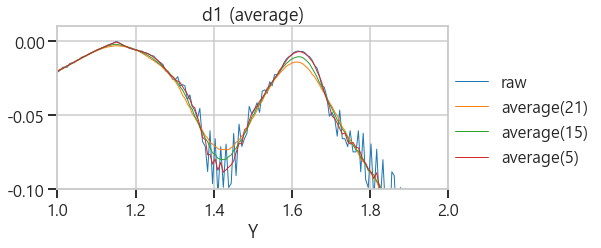

In [16]:
averagePlot(21, 15, 5)

box_size가 클수록 noise가 많이 제거된다. 당연하게도 데이터 왜곡 또한 일어난다.

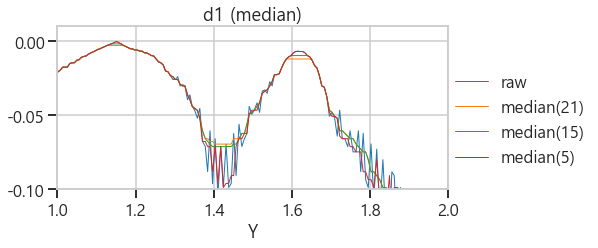

In [17]:
medianPlot(21, 15, 5)

median도 average랑 같은 양상을 보이나, 데이터 왜곡은 median이 더 많이 일어난 것처럼 보인다. 당연한 결과다. median은 극값의 영향을 덜 받으니까.

#### (2) Numpy smoothing options

In [18]:
# https://www.ksnve.or.kr/dictionary/?alpha=H
# cosine 함수에 0.5 값을 더한 형태?

def hanning(raw, box_size):
    box = np.hanning(box_size) / np.sum(np.hanning(box_size))
    raw_smooth = np.convolve(box, raw, mode="same")
    return raw_smooth

In [19]:
# https://www.ksnve.or.kr/dictionary/?alpha=H
# han 함수의 변형, cosine 함수에 0.53 값을 더한 형태

def hamming(raw, box_size):
    box = np.hamming(box_size) / np.sum(np.hamming(box_size))
    raw_smooth = np.convolve(box, raw, mode="same")
    return raw_smooth

In [20]:
def bartlett(raw, box_size):
    box = np.bartlett(box_size) / np.sum(np.bartlett(box_size))
    raw_smooth = np.convolve(box, raw, mode="same")
    return raw_smooth

In [21]:
def blackman(raw, box_size):
    box = np.blackman(box_size) / np.sum(np.blackman(box_size))
    raw_smooth = np.convolve(box, raw, mode="same")
    return raw_smooth

In [22]:
methods = ["hanning", "hamming", "bartlett", "blackman"]

In [23]:
def np_smooth(raw, method, box_size):
    w = eval(f"np.{method}(box_size)")
    raw_smooth = np.convolve(w / w.sum(), raw, mode="same")
    return raw_smooth

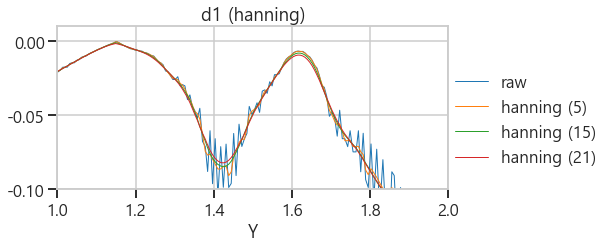

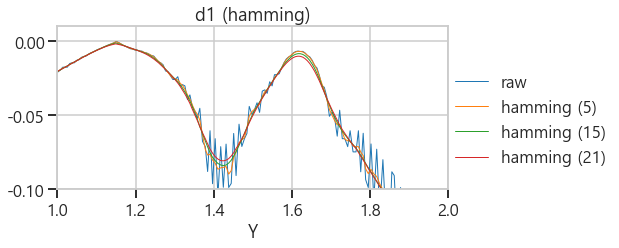

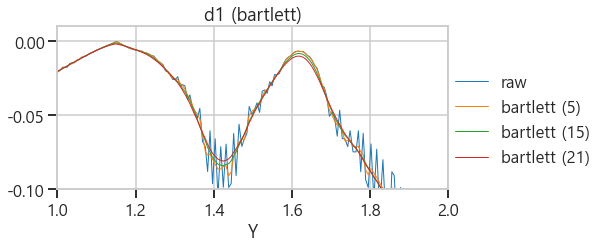

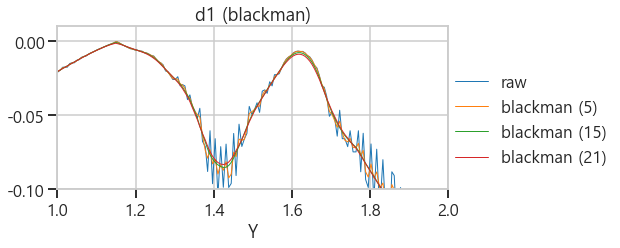

In [24]:
for method in methods:
    plt.figure(figsize=(7, 3))

    plt.plot(df["Y"].iloc[:-1], d1, lw=1, label="raw")
    plt.plot(df["Y"].iloc[:-1], np_smooth(d1, method, 5), lw=1, label=f"{method} (5)")
    plt.plot(df["Y"].iloc[:-1], np_smooth(d1, method, 15), lw=1, label=f"{method} (15)")
    plt.plot(df["Y"].iloc[:-1], np_smooth(d1, method, 21), lw=1, label=f"{method} (21)")

    plt.xlim((1, 2))
    plt.ylim((-0.1, 0.01))
    plt.xlabel("Y")
    plt.title(f"d1 ({method})")

    plt.legend(loc=[1, 0.1])
    plt.show()

전반적으로 비슷하게 제거되는 것을 볼 수 있다. 그러나 첫번째 골짜기를 보면 box_size에 상당한 영향을 받는 것을 볼 수 있으며, 어디까지가 노이즈인지 확실히 구분이 가지 않는다.

#### (3) Savitzky-Golay filter

In [25]:
def savgol(raw, box_size):
    raw_smooth = sg(raw, box_size, 2, mode="nearest")
    return raw_smooth

In [26]:
def savgolPlot(first, second, third):
    d1_sg1 = savgol(d1, first)
    d1_sg2 = savgol(d1, second)
    d1_sg3 = savgol(d1, third)

    plt.figure(figsize=(7, 3))
    plt.plot(df["Y"].iloc[:-1], d1, lw=1, label="raw")
    plt.plot(df["Y"].iloc[:-1], d1_sg1, lw=1, label=f"savgol (" + str(first) + ")")
    plt.plot(df["Y"].iloc[:-1], d1_sg2, lw=1, label=f"savgol (" + str(second) + ")")
    plt.plot(df["Y"].iloc[:-1], d1_sg3, lw=1, label=f"savgol (" + str(third) + ")")

    plt.xlim((1, 2))
    plt.ylim((-0.1, 0.01))
    plt.xlabel("Y")
    plt.title("d1")

    plt.legend(loc=[1, 0.1])
    plt.show()

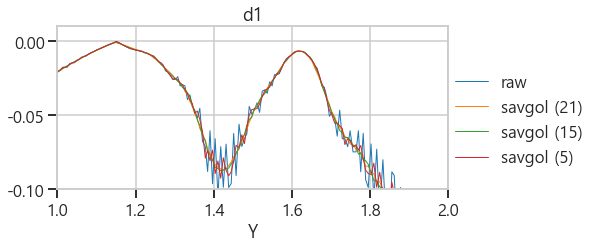

In [27]:
savgolPlot(21, 15, 5)

어떻게 보면 정제가 안 된 것처럼 보이기도 하는데, 상당히 극값에 대한 데이터 왜곡이 없어보이긴 합니다. 확실히 polynomial이 값의 기울기를 고려하다보니 이렇게 된 게 아닌가 싶다.

### 3.3.2 Savitzky-Golay filter application

- 노이즈 제거용으로 savgol 함수를 채택했으며, parameter 값은 15 정도로 결정했음.
- 매 미분 단계에서 노이즈 제거를 실시

In [28]:
d1s = savgol(d1, 15)
d2s_0 = np.diff(d1s) / np.diff(df["X"].iloc[:-1])
d2s = savgol(d2s_0, 15)
d3s_0 = np.diff(d2s) / np.diff(df["X"].iloc[:-2])
d3s = savgol(d3s_0, 15)

X:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1280: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


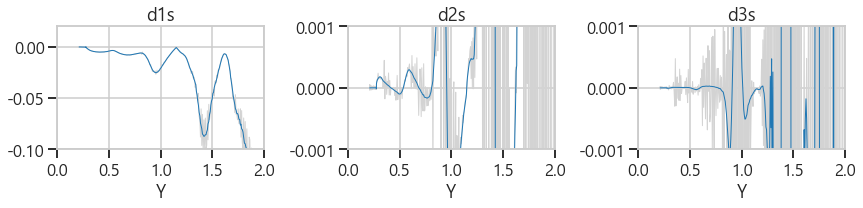

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharex=True)

ax[0].plot(df["Y"].iloc[:-1], d1, lw=1, c="lightgray")
ax[1].plot(df["Y"].iloc[:-2], d2, lw=1, c="lightgray")
ax[2].plot(df["Y"].iloc[:-3], d3, lw=1, c="lightgray")

ax[0].plot(df["Y"].iloc[:-1], d1s, lw=1)
ax[1].plot(df["Y"].iloc[:-2], d2s, lw=1)
ax[2].plot(df["Y"].iloc[:-3], d3s, lw=1)

ax[0].set_xlim((0, 2))
ax[0].set_ylim((-0.1, 0.02))
ax[1].set_ylim((-0.001, 0.001))
ax[2].set_ylim((-0.001, 0.001))

for i in range(3):
    ax[i].set_xlabel("Y")

ax[0].set_title("d1s")
ax[1].set_title("d2s")
ax[2].set_title("d3s")

plt.tight_layout()

numpy 함수가 noise를 줄이는 쪽으로 더 발전했나 봅니다.<br />
이 정도로도 가능하지만, 원본에선 그렇지 못하니 다른 방법을 진행해봅니다.

### 3.3.3 Data Quality Refinement

In [30]:
df_xu = df.groupby(df["X"]).nth(0).reset_index()

In [31]:
print(f"data size (raw) = {df.shape[0]}",
      f"data size (refined) = {df_xu.shape[0]}", sep="\n")

data size (raw) = 490
data size (refined) = 430


In [32]:
d1s_0 = np.diff(df_xu["Y"]) / np.diff(df_xu["X"])
d1s = savgol(d1s_0, 15)
d2s_0 = np.diff(d1s) / np.diff(df_xu["X"].iloc[:-1])
d2s = median(average(savgol(d2s_0, 15), 9), 3)
d3s_0 = np.diff(d2s_0) / np.diff(df_xu["X"].iloc[:-2])
d3s = median(average(savgol(d3s_0, 15), 3), 5)

noise가 너무 많이 제거 되니까 3차 미분 계수 구할 땐 noise 제거 안 한 걸 이용한 건가

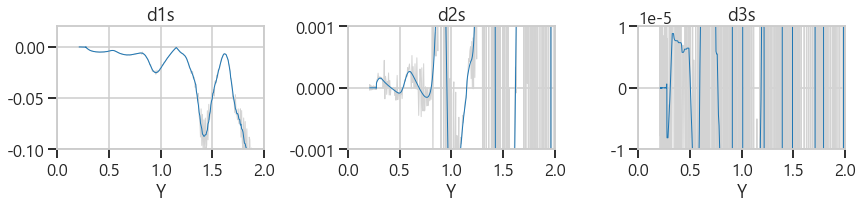

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharex=True)

ax[0].plot(df["Y"].iloc[:-1], d1, lw=1, c="lightgray")
ax[1].plot(df["Y"].iloc[:-2], d2, lw=1, c="lightgray")
ax[2].plot(df["Y"].iloc[:-3], d3, lw=1, c="lightgray")

ax[0].plot(df_xu["Y"].iloc[:-1], d1s, lw=1)
ax[1].plot(df_xu["Y"].iloc[:-2], d2s, lw=1)
ax[2].plot(df_xu["Y"].iloc[:-3], d3s, lw=1)

ax[0].set_xlim((0, 2))
ax[0].set_ylim((-0.1, 0.02))
ax[1].set_ylim((-0.001, 0.001))
ax[2].set_ylim((-1e-5, 1e-5))

for i in range(3):
    ax[i].set_xlabel("Y")

ax[0].set_title('d1s')
ax[1].set_title('d2s')
ax[2].set_title('d3s')

plt.tight_layout()

전과 비교해서 noise가 더 제거되긴 했음. 확실히 깨끗해졌음. 근데 왜 탐탁치가 않지?

## 3.4 Plateau Detection

In [34]:
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["mathtext.default"] = "it"
font_title = {
    "fontsize": 30, "fontweight": plt.rcParams["axes.titleweight"],
    "verticalalignment": "center", "horizontalalignment": "center"}

### 3.4.1 Data Screening

- plateau를 찾기 위한 tolerance 설정
- tolerance: 허용 오차, 오차값 이내라고 얘기할 때 그 오차

In [35]:
d1tol = 0.02
d2tol = 1e-4
d3tol = 5e-6

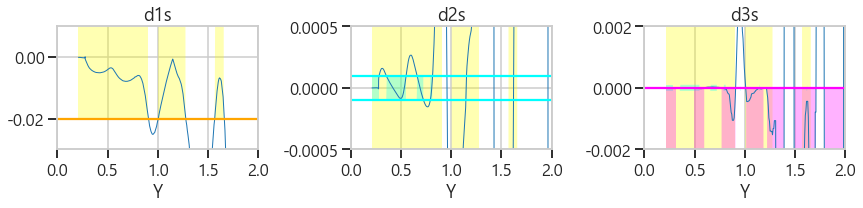

In [36]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharex=True)

# ? 1st derivative
ax[0].plot(df_xu["Y"].iloc[:-1], d1s, lw=1, zorder=2)
ax[0].axhline(y=d1tol, c="orange")
ax[0].axhline(y=-d1tol, c="orange")
ax[0].fill_between(df_xu["Y"].iloc[:-1], -d1tol, d1tol,
    where=abs(d1s) <= d1tol, facecolor="yellow", interpolate=True, alpha=0.3)

ax[1].fill_between(df_xu["Y"].iloc[:-1], -d1tol, d1tol,
    where=abs(d1s) <= d1tol, facecolor="yellow", interpolate=True, alpha=0.3)

ax[2].fill_between(df_xu["Y"].iloc[:-1], -d1tol, d1tol,
    where=abs(d1s) <= d1tol, facecolor="yellow", interpolate=True, alpha=0.3)

# ? 2nd derivative
ax[1].plot(df_xu["Y"].iloc[:-2], d2s, lw=1, zorder=2)
ax[1].axhline(y=d2tol, c="cyan")
ax[1].axhline(y=-d2tol, c="cyan")
ax[1].fill_between(df_xu["Y"].iloc[:-2], -d2tol, d2tol,
    where=abs(d2s) <= d2tol, facecolor="cyan", interpolate=True, alpha=0.3)

ax[2].fill_between(df_xu["Y"].iloc[:-2], -d2tol, d2tol,
    where=abs(d2s) <= d2tol, facecolor="cyan", interpolate=True, alpha=0.3)

# ? 3rd derivative
ax[2].plot(df_xu["Y"].iloc[:-3], d3s, lw=1, zorder=2)
ax[2].axhline(y=d3tol, c="magenta")
ax[2].fill_between(df_xu["Y"].iloc[:-3], -100, d3tol,
    where=d3s <= d3tol, facecolor="magenta", interpolate=True, alpha=0.3)

ax[0].set_xlim((0, 2))
ax[0].set_ylim((-0.03, 0.01))
ax[1].set_ylim((-0.0005, 0.0005))
ax[2].set_ylim((-0.002, 0.002))

for i in range(3):
    ax[i].set_xlabel("Y")

ax[0].set_title("d1s")
ax[1].set_title("d2s")
ax[2].set_title("d3s")

plt.tight_layout()

### 3.4.2 Plateau Detection

In [37]:
screen1 = np.where(abs(d1s) < d1tol)[0]
screen2 = np.where(abs(d2s) < d2tol)[0]
screen3 = np.where(d3s <= d3tol)[0]
plateau = np.array([i for i in screen1 if i in screen2 and i in screen3])

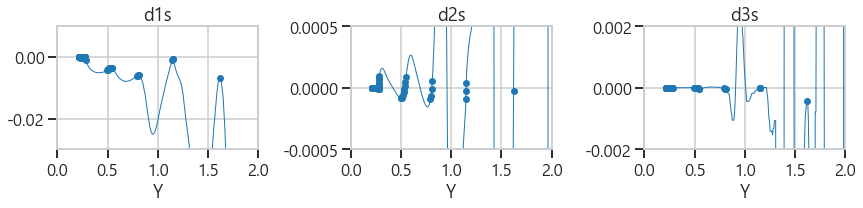

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharex=True)

ax[0].plot(df_xu["Y"].iloc[:-1], d1s, lw=1, zorder=2)
ax[1].plot(df_xu["Y"].iloc[:-2], d2s, lw=1, zorder=2)
ax[2].plot(df_xu["Y"].iloc[:-3], d3s, lw=1, zorder=2)

ax[0].scatter(df_xu["Y"].iloc[plateau], d1s[plateau], s=30)
ax[1].scatter(df_xu["Y"].iloc[plateau], d2s[plateau], s=30)
ax[2].scatter(df_xu["Y"].iloc[plateau], d3s[plateau], s=30)

ax[0].set_xlim((0, 2))
ax[0].set_ylim((-0.03, 0.01))
ax[1].set_ylim((-0.0005, 0.0005))
ax[2].set_ylim((-0.002, 0.002))

for i in range(3):
    ax[i].set_xlabel("Y")

ax[0].set_title("d1s")
ax[1].set_title("d2s")
ax[2].set_title("d3s")

plt.tight_layout()

plot을 그려봤을 때 이 정도 위치가 plateau인 것 같다 싶은 값을 기준으로 미분값에 그 지점을 표시해봤다.

### 3.4.3 Clustering

In [39]:
eps = 3e-2
min_samples = 1
p1 = np.array(df_xu["Y"].iloc[plateau]).reshape((-1, 1))

In [40]:
clusters = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1).fit(p1)

In [41]:
ncluster = len(np.unique(clusters.labels_))

In [42]:
phase_trs = []
for cluster in range(ncluster):
    cl_idx = plateau[clusters.labels_ == cluster][0]
    phase_tr = cl_idx + abs(d1s[plateau][clusters.labels_ == cluster]).argmin()
    phase_trs.append(phase_tr)
phase_trs = np.array(phase_trs)

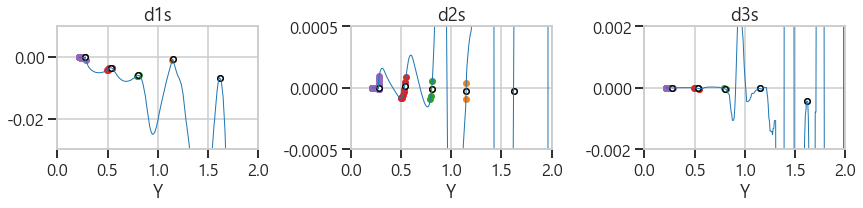

In [43]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharex=True)

ax[0].plot(df_xu["Y"].iloc[:-1], d1s, lw=1, zorder=2)
ax[1].plot(df_xu["Y"].iloc[:-2], d2s, lw=1, zorder=2)
ax[2].plot(df_xu["Y"].iloc[:-3], d3s, lw=1, zorder=2)

for cluster in range(ncluster):
    cl_idx = plateau[clusters.labels_ == cluster]
    ax[0].scatter(df_xu["Y"].iloc[cl_idx], d1s[cl_idx], s=30)
    ax[1].scatter(df_xu["Y"].iloc[cl_idx], d2s[cl_idx], s=30)
    ax[2].scatter(df_xu["Y"].iloc[cl_idx], d3s[cl_idx], s=30)

    ph_idx = phase_trs[cluster]
    ax[0].scatter(df_xu["Y"].iloc[ph_idx], d1s[ph_idx], s=30, c="w", ec="k")
    ax[1].scatter(df_xu["Y"].iloc[ph_idx], d2s[ph_idx], s=30, c="w", ec="k")
    ax[2].scatter(df_xu["Y"].iloc[ph_idx], d3s[ph_idx], s=30, c="w", ec="k")

ax[0].set_xlim((0, 2))
ax[0].set_ylim((-0.03, 0.01))
ax[1].set_ylim((-0.0005, 0.0005))
ax[2].set_ylim((-0.002, 0.002))

for i in range(3):
    ax[i].set_xlabel("Y")

ax[0].set_title("d1s")
ax[1].set_title("d2s")
ax[2].set_title("d3s")

plt.tight_layout()

어림짐작한 값에서 DBSCAN을 통해 값이 변하지 않는 부분을 캐치하고, 그 지점을 n차 미분 값에서 표현한 것.

타이틀 달기

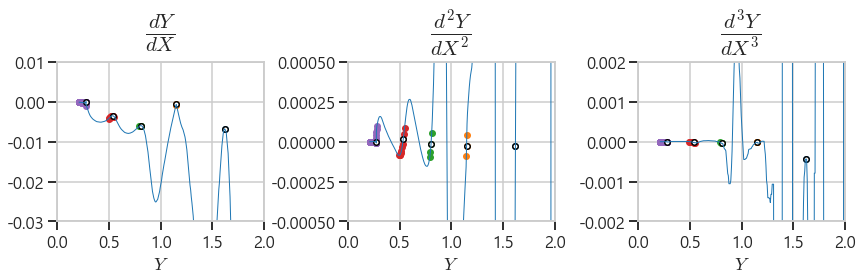

In [44]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharex=True)

ax[0].plot(df_xu["Y"].iloc[:-1], d1s, lw=1, zorder=2)
ax[1].plot(df_xu["Y"].iloc[:-2], d2s, lw=1, zorder=2)
ax[2].plot(df_xu["Y"].iloc[:-3], d3s, lw=1, zorder=2)

for cluster in range(ncluster):
    cl_idx = plateau[clusters.labels_ == cluster]
    ax[0].scatter(df_xu["Y"].iloc[cl_idx], d1s[cl_idx], s=30)
    ax[1].scatter(df_xu["Y"].iloc[cl_idx], d2s[cl_idx], s=30)
    ax[2].scatter(df_xu["Y"].iloc[cl_idx], d3s[cl_idx], s=30)

    ph_idx = phase_trs[cluster]
    ax[0].scatter(df_xu["Y"].iloc[ph_idx], d1s[ph_idx], s=30, c="w", ec="k")
    ax[1].scatter(df_xu["Y"].iloc[ph_idx], d2s[ph_idx], s=30, c="w", ec="k")
    ax[2].scatter(df_xu["Y"].iloc[ph_idx], d3s[ph_idx], s=30, c="w", ec="k")

ax[0].set_xlim((0, 2))
ax[0].set_ylim((-0.03, 0.01))
ax[1].set_ylim((-0.0005, 0.0005))
ax[2].set_ylim((-0.002, 0.002))

for i in range(3):
    ax[i].set_xlabel(r"$Y$")

ax[0].set_title(r"$\mathit{\frac{dY}{dX}}$", fontdict=font_title, pad=30)
ax[1].set_title(r"$\mathit{\frac{d^2Y}{dX^2}}$", fontdict=font_title, pad=30)
ax[2].set_title(r"$\mathit{\frac{d^3Y}{dX^3}}$", fontdict=font_title, pad=30)

plt.tight_layout()

## 3.5 Summary

### 3.5.1 Visualization

- inset: graph의 일부 부분을 확대해서 원 graph 안에 넣는 것.
- matplotlib's ```inset_axis``` 이용

<!-- 목적이 X - Y 였나? Plateau를 찾아서 시각화하는 게 목표 아니었나? 내가 중간에 졸았나? -->

<ipython-input-45-8e4d6d52ac2a>:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


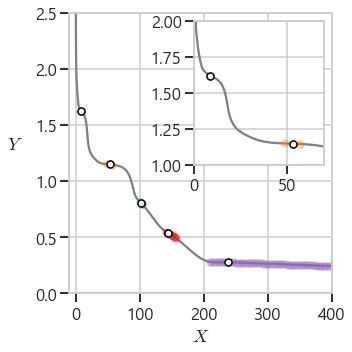

In [45]:
fig, ax = plt.subplots(figsize=(5, 5))
axin = inset_axes(ax, width=1.8, height=2)
# 여기서 Opencv의 

ax.plot(df_xu["X"], df_xu["Y"], c="gray", zorder=1)
axin.plot(df_xu["X"], df_xu["Y"], c="gray", zorder=1)

for cluster in range(ncluster):
    cl_idx = plateau[clusters.labels_ == cluster]
    ax.scatter(df_xu["X"].iloc[cl_idx], df_xu["Y"].iloc[cl_idx], s=50, c=f"C{cluster}", alpha=0.3, zorder=2)
    axin.scatter(df_xu["X"].iloc[cl_idx], df_xu["Y"].iloc[cl_idx], s=50, alpha=0.3, zorder=2)

    ph_idx = phase_trs[cluster]
    ax.scatter(df_xu["X"].iloc[ph_idx], df_xu["Y"].iloc[ph_idx], s=50, c="w", ec="k", zorder=2)
    axin.scatter(df_xu["X"].iloc[ph_idx], df_xu["Y"].iloc[ph_idx], s=50, c="w", ec="k", zorder=2)

ax.set_xlim((-10, 400))
ax.set_ylim((0, 2.5))

axin.set_xlim((0, 70))
axin.set_ylim((1, 2))

ax.set_xlabel(r"$X$")
ax.set_ylabel(r"$Y$", rotation=0, labelpad=20)

plt.tight_layout()

### 3.5.2 Summary to .csv

In [46]:
d = {"trX": df_xu["X"].iloc[phase_trs], "trY": df_xu["X"].iloc[phase_trs]}
summary = pd.DataFrame(data=d).reset_index(drop=True)
# summary.to_csv("6_pld_summary.csv")